<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Spring 20 midterm, Section 6</div>
<div style="text-align: right">Dino Konstantopoulos, 15 March 2020</div>


This notebook is dedicated to Li Wenliang, "*a healthy society should have more than one voice*".

# INFO 6105 Spring 20 Midterm

You have up to two hours, and then a time window of 2 hours to submit. Earlier submissions have an advantage over later ones, unless later ones have better results. Since we don't have class on Tuesday, you may also continue to work on this midterm as a homework for bonus points, due before class next Thursday.

You are going to model the Coronavirus!

<br />
<center>
<img src="https://www.paho.org/hq/images/stories/2020/coronavirus-6-1400x592.jpg" width=600 />
</center>

# Data from China

This [website](https://github.com/BlankerL/DXY-COVID-19-Data) is a result of good citizenship: People posting real data that can help other people learn from mistakes and fare better.

Download this data, import `DXYArea.csv` as a pandas dataframe, and plot some interesting plots.

In [3]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
covid19_china = pd.read_csv('DXYArea.csv')
covid19_china

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,甘肃省,Gansu,620000,境外输入人员,NaN,0.0,133,0,91,2,42,0,2,0,2020-03-15 21:41:38.179
1,甘肃省,Gansu,620000,兰州,Lanzhou,620100.0,133,0,91,2,36,0,34,2,2020-03-15 21:41:38.179
2,甘肃省,Gansu,620000,天水,Tianshui,620500.0,133,0,91,2,12,0,12,0,2020-03-15 21:41:38.179
3,甘肃省,Gansu,620000,平凉,Pingliang,620800.0,133,0,91,2,9,0,9,0,2020-03-15 21:41:38.179
4,甘肃省,Gansu,620000,定西,Dingxi,621100.0,133,0,91,2,9,0,9,0,2020-03-15 21:41:38.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70349,云南省,Yunnan,530000,昆明,Kunming,530100.0,2,0,0,0,2,0,0,0,2020-01-24 03:50:31.353
70350,山西省,Shanxi,140000,太原,Taiyuan,140100.0,1,0,0,0,1,0,0,0,2020-01-24 03:50:31.353
70351,吉林省,Jilin,220000,长春,Changchun,220100.0,1,0,0,0,1,0,0,0,2020-01-24 03:50:31.353
70352,河北省,Hebei,130000,石家庄,Shijiazhuang,130100.0,1,0,0,1,1,0,0,0,2020-01-24 03:50:31.353


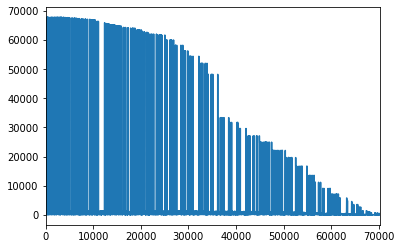

In [4]:
reversCovid19 = covid19_china.reindex(index=covid19_china.index[::-1])
province_confirmedCount = covid19_china.province_confirmedCount
province_confirmedCount.plot()
plt.show() 

Now drop the columns 'province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode', and display the dataframe.

In [5]:
covid19_china.drop([ 'province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode'],axis=1)

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
0,甘肃省,Gansu,境外输入人员,NaN,133,91,2,42,2,0,2020-03-15 21:41:38.179
1,甘肃省,Gansu,兰州,Lanzhou,133,91,2,36,34,2,2020-03-15 21:41:38.179
2,甘肃省,Gansu,天水,Tianshui,133,91,2,12,12,0,2020-03-15 21:41:38.179
3,甘肃省,Gansu,平凉,Pingliang,133,91,2,9,9,0,2020-03-15 21:41:38.179
4,甘肃省,Gansu,定西,Dingxi,133,91,2,9,9,0,2020-03-15 21:41:38.179
...,...,...,...,...,...,...,...,...,...,...,...
70349,云南省,Yunnan,昆明,Kunming,2,0,0,2,0,0,2020-01-24 03:50:31.353
70350,山西省,Shanxi,太原,Taiyuan,1,0,0,1,0,0,2020-01-24 03:50:31.353
70351,吉林省,Jilin,长春,Changchun,1,0,0,1,0,0,2020-01-24 03:50:31.353
70352,河北省,Hebei,石家庄,Shijiazhuang,1,0,1,1,0,0,2020-01-24 03:50:31.353


How many rows in the dataframe? 68703

In [6]:
len(covid19_china)

70354

Do some data healing to remove all NaN entries.

In [7]:
covid19_china = covid19_china.dropna()

What's the new number of rows?

In [8]:
len(covid19_china)

68465

What are the city names?

In [9]:
covid19_china.cityEnglishName.values

array(['Lanzhou', 'Tianshui', 'Pingliang', ..., 'Changchun',
       'Shijiazhuang', 'Yinchuan'], dtype=object)

How many rows refer to the city of Wuhan?

In [10]:
wuhanData = covid19_china[covid19_china.cityEnglishName.str.contains('Wuhan')]
wuhanLength = len(wuhanData)
wuhanLength

366

Print the dataframe with rows that only refer to Wuhan.

In [11]:
wuhanData

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
32,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67794,0,54288,3085,49999,0,37642,2456,2020-03-15 18:07:03.272
274,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67794,0,54278,3085,49995,0,36465,2446,2020-03-15 08:49:13.790
388,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52960,3075,49995,0,36465,2446,2020-03-14 17:58:00.660
405,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52962,3075,49995,0,36467,2446,2020-03-14 17:49:06.329
447,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52959,3075,49995,0,36467,2446,2020-03-14 16:54:11.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69794,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 11:49:48.584
70050,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:50:40.357
70058,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:49:39.772
70064,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:48:39.253


Sort by 'updateTime'.

In [12]:
wuhanData = wuhanData.sort_values(by=['updateTime'])
wuhanData

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
70068,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:47:38.698
70064,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:48:39.253
70058,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:49:39.772
70050,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 09:50:40.357
69794,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0,2020-01-24 11:49:48.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52959,3075,49995,0,36467,2446,2020-03-14 16:54:11.267
405,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52962,3075,49995,0,36467,2446,2020-03-14 17:49:06.329
388,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52960,3075,49995,0,36465,2446,2020-03-14 17:58:00.660
274,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67794,0,54278,3085,49995,0,36465,2446,2020-03-15 08:49:13.790


Reset the dataframe's index to be 'updateTime'

In [13]:
wuhanData = wuhanData.set_index('updateTime')
wuhanData

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38.698,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:48:39.253,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:49:39.772,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:50:40.357,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 11:49:48.584,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-14 16:54:11.267,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52959,3075,49995,0,36467,2446
2020-03-14 17:49:06.329,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52962,3075,49995,0,36467,2446
2020-03-14 17:58:00.660,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67790,0,52960,3075,49995,0,36465,2446


Plot 'confirmedCount', 'curedCount', and 'deadCount' for the city of Wuhan.

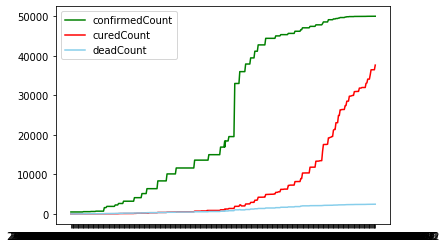

In [14]:
plt.plot(wuhanData.city_confirmedCount, color='green', label='confirmedCount')
plt.plot(wuhanData.city_curedCount, color='red', label='curedCount')
plt.plot(wuhanData.city_deadCount,  color='skyblue', label='deadCount')
plt.legend() 
plt.show()

Do the same for the province of Hubei (including resetting the index).

In [15]:
HubeiData = covid19_china[covid19_china.provinceEnglishName.str.contains('Hubei')]
HubeiData = HubeiData.sort_values(by=['updateTime'])
HubeiData = HubeiData.set_index('updateTime')
len(HubeiData)

5998

Plot the same plot for the province of Hubei.

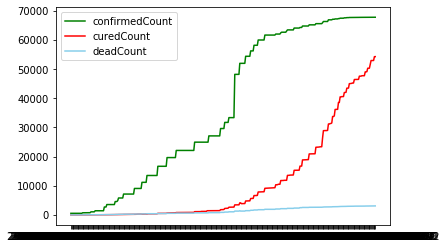

In [16]:
plt.plot(HubeiData.province_confirmedCount, color='green', label='confirmedCount')
plt.plot(HubeiData.province_curedCount, color='red', label='curedCount')
plt.plot(HubeiData.province_deadCount,  color='skyblue', label='deadCount')
plt.legend() 
plt.show()

And now for Shanghai.

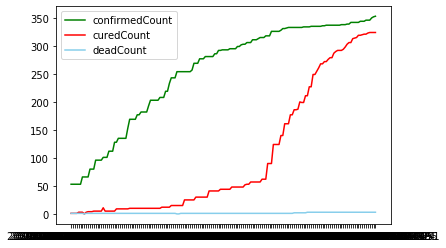

In [17]:
ShanghaiData = covid19_china[covid19_china.provinceEnglishName.str.contains('Shanghai')]
ShanghaiData = ShanghaiData.sort_values(by=['updateTime'])
ShanghaiData = ShanghaiData.set_index('updateTime')
plt.plot(ShanghaiData.province_confirmedCount, color='green', label='confirmedCount')
plt.plot(ShanghaiData.province_curedCount, color='red', label='curedCount')
plt.plot(ShanghaiData.province_deadCount,  color='skyblue', label='deadCount')
plt.legend() 
plt.show()

And now for Beijing.

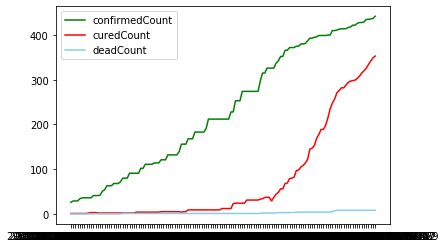

In [18]:
BeijingData = covid19_china[covid19_china.provinceEnglishName.str.contains('Beijing')]
BeijingData = BeijingData.sort_values(by=['updateTime'])
BeijingData = BeijingData.set_index('updateTime')
plt.plot(BeijingData.province_confirmedCount, color='green', label='confirmedCount')
plt.plot(BeijingData.province_curedCount, color='red', label='curedCount')
plt.plot(BeijingData.province_deadCount,  color='skyblue', label='deadCount')
plt.legend() 
plt.show()

Let's come up with a possible infection model..

# A possible model of infection

This requires version 3.8 of `PyMC3'!

In [19]:
import pymc3 as pm
pm.__version__

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


'3.8'

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

## Acquired immunity controls the infection

The Susceptible-Infected-Recovered model of infection describes time dynamics of an 
[infectious disease](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) spreading through a homogenous closed population (no births or deaths). The population is divided into three categories: **Susceptible** `S`, **Infective** `I`, or **Recovered/Dead** `R`. We can further refine our model by having a different category `D` for dead, but let's keep it simple for now and include dead people as recovered. When people die, if properly buried, they cannot infect anymore and so they are equivalent to people that have recovered and are immune to the infection.

Susceptible individuals are those that have not acquired immunity yet and are susceptible to becoming infected.

Infected individuals have been infected with the disease.

Recovered individuals are cured and not susceptible anymore to the disease.

>**NOTE**: In China, some people have been described as cured and released from hospitals and yet they test positive again for Covid19 later on. This is actually impossible because if you recover, you *have to be immune* to the disease, and is most likley assocaited with false positives and false negatives (patients where either impoperly labeled as cured, or improperly tested as infected). It is also possible that we are dealing with multiple Covid19 strains, in which case it is possible to become infected with another strain after being cured from one. It may also be possible that the virus mutates so fast that it essentially becomes a different strain in a few days and can reinfect an immune individual. God help us all if that is the case.

[Differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation) are a mathematical framework for modelling temporal dynamics of a system. The [differential equations for the SIR model of infection](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) are:

$$\dfrac{dS}{dt} = - \beta SI \quad S(0) = S_0$$

$$\dfrac{dI}{dt} = \beta SI - \gamma I \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

With the constraint that: 

$$S(t) + I(t) + R(t) = 1 \;\;, \forall t$$

Other models are available for modeling infectious diseases, such as the [IBM](https://arxiv.org/ftp/arxiv/papers/1902/1902.02784.pdf) model.

If we know R(t) and I(t) then we can determine S(t): $S(t) = 1 - I(t) - R(t)$, so we can work only with the two unknowns: R(t) and I(t). We prefer to work with these because that is what the China Covid19 dataset gives us!

So we write:

$$\dfrac{dI}{dt} = \beta (1 - I - R) I - \gamma I \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

Simplifying:

$$\dfrac{dI}{dt} = \beta (1 - I - R -\gamma/\beta) I  \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

We have two equations in two unknowns, so we're good mathematicaly speaking. What are the parameters?

$β$ is the rate of infection per susceptible and per infective individual: $\beta$ is an average infected to non-infected individual contact (e.g. 4 individuals) and hinges on the underlying society. Arguably, it is higher in China where the population is denser. But it also high in very social Mediterranean countries like Italy and Spain. $\gamma$ is the rate of recovery: It can be interpreted as an average period of infectiousness (e.g. 3 to 5 days for the common flu). For Covid19, experts are astonished by how long an individual can infect others and say that it can be up to 30 days! 

>For an example, in the Hong Kong flu in New York City in the late 1960's, hardly anyone was immune at the beginning of the epidemic, so almost everyone was susceptible. [This](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) paper gives an estimate for the parameters. Assuming a trace level of infection in the population, say, 10 people, population variables are S(0) = 7,900,000, I(0) = 10, R(0) = 0. In terms of scaled variables, these initial conditions are s(0) = 1, i(0) = 1.27 x 10-6, r(0) = 0. We don't know values for the parameters $\beta$ and $\gamma$ yet, but they can be estimated and then adjusted as necessary to fit the excess death data. The average period of infectiousness is estimated at three days, so that would suggest  $\gamma = 1/3$.  *Guessing* that each infected individual would make a possibly infecting contact with another individual every two days, then $\beta$ would be $1/2$. So $\beta/\gamma = 3/2 > 1$.

The quantity $β/γ$ is called [R-Nought](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1181873/) ($R_0$). Its interpretation is that if we were to drop a *single* infected person into a population of suceptible individuals, we would expect $R_0$ new infections. If $R_0>1$, then an epidemic will take place. If $R_0≤1$ then there will be no epidemic.

>When $R_0<1$, each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will fizzle ($dI/dt<0$). When $R_0>1$, each person who gets the disease will infect more than one person, so the epidemic will spread ($dI/dt>0$). $R_0$ is the most important quantity in epidemiology.

Let's model our SIR equations using a python function. `y` is our unknown, it's 2D: $y[0] = I$ and $y[1] = R$. . The parameters `p` are 2D: $p[0] = \beta$ and $p[1] = \gamma$. 

In [21]:
def SIR(y, t, p):
    di = p[0] * (1. - y[0] - y[1] - p[1]/p[0]) * y[0]
    dr = p[1] * y[0]
    return [di, dr]

Write down the python function that will yield the suceptible population, given the infected and recovered population:

In [22]:
def susceptible(i, r):
    s = 1 - i - r
    return s

This is our time discretization (about 3 months of data by day data):

In [23]:
times = np.arange(0, 5, 0.25)

Let's compute *exact* values for `y` (y\[0\] = I and y\[1\] = R). Let's assume that I(0) = 0.01 and R(0) = 0. In other words, we start with 1% infected individuals in the population, 0 recovered, and so 1 - 0.01 - 0 = 99% susceptible individuals.

Let's pick some values for $\beta$ and $\gamma$ to begin with (we will model them based on China's data leter on), which guarantee an epidemic ($\beta > \gamma$):

In [24]:
beta, gamma = 4.0, 1.0

Realistically, an individual may be in infectious contact with more than 4 other individuals per day, and Covid19's infectivity is much bigger than 1 day!

We use the library `odeint` from the package `scipy.integrate` to solve the ordinary differential equations for SIR:

In [25]:
from scipy.integrate import odeint

# Compute true curves
y = odeint(SIR, t=times, y0=[0.01, 0.0], args=((beta, gamma),), rtol=1e-8)
y

array([[0.01      , 0.        ],
       [0.0208257 , 0.00369366],
       [0.04246544, 0.01130492],
       [0.083082  , 0.02650486],
       [0.15079362, 0.05513194],
       [0.24292884, 0.10400761],
       [0.3349354 , 0.17661942],
       [0.3933139 , 0.26860411],
       [0.40470816, 0.36928649],
       [0.37975604, 0.46791413],
       [0.3359828 , 0.55761153],
       [0.28660856, 0.63545595],
       [0.23898306, 0.70107272],
       [0.19638616, 0.75537256],
       [0.15983607, 0.79977261],
       [0.12923981, 0.83578799],
       [0.10402352, 0.86484124],
       [0.08345368, 0.88818694],
       [0.06679166, 0.90689355],
       [0.05336167, 0.92185186]])

The data has uncertainty (or ***noise***) because of our measurement tools ([aleatoric uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification)), but also because the modeling equations are ot perfect ([epistemic uncertainity](https://en.wikipedia.org/wiki/Uncertainty_quantification)).

We pick a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability distribution whose logarithm is *normally distributed* (thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution) as our observations pdf, with a mean equal to the log of `y`. 

>**NOTE**: Recall that taking the logarithm of a histogram of a dataset makes the histogram look much prettier (可爱极了), i.e. closer to a normal distribution, so that we can indeed model it as a normal distribution. So this is a very common operation amongst data scientists.

So, these are our observations: Data from the true curves for I and R with errors 10% and 10% respectively

In [26]:
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.1, 0.1])

In [27]:
yobs

array([[0.01952084, 0.00362415],
       [0.04115276, 0.01138124],
       [0.07849226, 0.03089111],
       [0.15399007, 0.05586049],
       [0.25466354, 0.11059657],
       [0.34624689, 0.17721712],
       [0.38685067, 0.26401951],
       [0.45157131, 0.39810661],
       [0.31893978, 0.53606776],
       [0.33912123, 0.49158982],
       [0.34589206, 0.72910046],
       [0.26904925, 0.78115388],
       [0.1888035 , 0.85132142],
       [0.15638618, 0.7483129 ],
       [0.12480083, 0.86323443],
       [0.08840657, 0.83846654],
       [0.07771318, 0.82812273],
       [0.07370325, 0.76002162],
       [0.05505281, 0.98058128]])

In [28]:
yobs[:,0]

array([0.01952084, 0.04115276, 0.07849226, 0.15399007, 0.25466354,
       0.34624689, 0.38685067, 0.45157131, 0.31893978, 0.33912123,
       0.34589206, 0.26904925, 0.1888035 , 0.15638618, 0.12480083,
       0.08840657, 0.07771318, 0.07370325, 0.05505281])

Now plot our observations as datapoints on top of the exact values for S and I. R is not observed but estimated from the exact curves for S and I. Plot that, too.

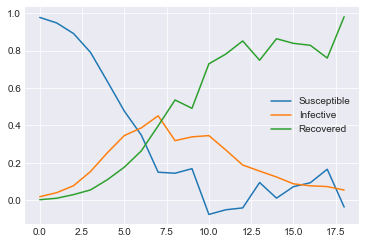

In [29]:
plt.plot(susceptible(yobs[:,0], yobs[:, 1]), label='Susceptible')
plt.plot(yobs[:,0],label='Infective')
plt.plot(yobs[:,1],label='Recovered')
plt.legend() 

This data looks very close to our China data: Driven by rising infections, susceptible population diminishes due to acquired immunity, which controls the infection and brings it down to zero after it reaches a peak of 40% of the population, for the values of the parameters $\beta$ and $\gamma$ that we picked. Very sobering.

Our China data though is only up to timepoint 2. We have *yet* to observe the infection to come down. All we observe in China is that *the number of new infections is coming down to almost zero*, which means we are approaching the peak of the Infected curve $I(t)$.

# Modeling with China's data

Let's model China's infection data with Bayesian estimation in order to figure out the critical Chinese $\beta$ and $\gamma$ parameters. Based on social comparisons, we can estimate our own $\beta$ parameter, so that will give us a disease $R_0$, which will tell us how *dangerous* Covid19 really is.

>Flyers about how the flu kills more people than Covid19 abounded around campus, and are probably partly responsible for the complacent response to the epidemic in Western societies. Let's see how much *more dangerous* than the flu it really is.

Let's plot Wuhan's infected and cured populations once again:

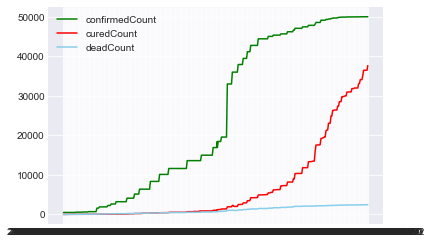

In [30]:
plt.plot(wuhanData.city_confirmedCount, color='green', label='confirmedCount')
plt.plot(wuhanData.city_curedCount, color='red', label='curedCount')
plt.plot(wuhanData.city_deadCount,  color='skyblue', label='deadCount')
plt.legend() 
plt.show()

### Extrapolating Chinese data to the fizzling out of the pandemic

We have to complete the Chinese data since it only goes up to the peak. We will assume that what we hear from China is correct: The epidemic has peaked and is petering out, thanks to the draconian quarantine measures undertaken. So let's just mirror out the infected data so that it decreases at the same rate, and let's just continue the progression of the cured curve.

In other words, you are going to extend `DXYArea.csv` so that it looks like the modelled profiles above. You are going to assume that the epidemic is being contained and that the number of infected people will go down to zero like the model above. So you are going to have to essentially *mirror* the **infected** population profile, and *extrapolate* the **recovered** population profile.

You will add dead people to the **recovered** people curve, so that our empirical data will match our model data.

Wuhan was the hardest hit city, so you will do this just for Wuhan data.

Probably the hardest part will be extending the index, so that you go an extra couple of months from the last data in the empirical data, that is where the number of infected people goes down to zero, and the number of recovered people keeps increasing (just do a simple linear interpolation for the recovered people).

Your dataframe should look something like this:

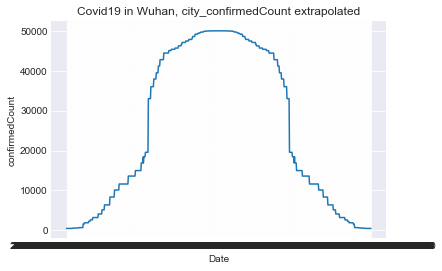

In [31]:
import datetime
##plt.plot(wuhanData.city_confirmedCount)
dateIndex = wuhanData.city_confirmedCount.index
type(dateIndex)
dayOne = datetime.datetime.strptime(dateIndex[0], '%Y-%m-%d %H:%M:%S.%f')
lastDay = datetime.datetime.strptime(dateIndex[-1], '%Y-%m-%d %H:%M:%S.%f')
timeDifference = lastDay - dayOne
newDateIndex = []
for x in dateIndex:
    day = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    newday = day + datetime.timedelta(days=timeDifference.days + 1)
    newDateIndex.append(newday.strftime('%Y-%m-%d %H:%M:%S.%f'))
newIndex  = list(dateIndex) + newDateIndex
reversedSeries = wuhanData.city_confirmedCount[::-1]
reversedSeries = pd.Series(list(reversedSeries))
reversedSeries.index = newDateIndex
city_confirmedCount = pd.concat([wuhanData.city_confirmedCount, reversedSeries])
plt.plot(city_confirmedCount)
plt.title('Covid19 in Wuhan, city_confirmedCount extrapolated')
plt.ylabel('confirmedCount')
plt.xlabel('Date')
plt.grid(True)

Let's add a column that is the sum of curedCount through deadCount:

In [32]:
wuhanData['recoveredCount'] = wuhanData.iloc[:, 12:14].sum(axis=1)

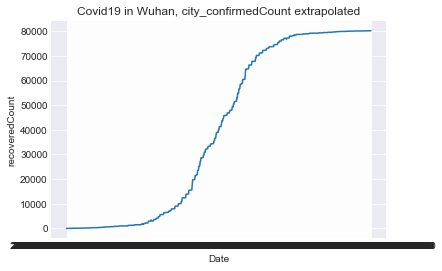

In [33]:
wuhanData['recoveredCount'] = wuhanData.iloc[:, 12:14].sum(axis=1)
finalRecoveredCount = wuhanData.recoveredCount.iloc[-1]*2
lastRecoveredCount = pd.Series([finalRecoveredCount], index=[len(newIndex)]) 
newrecoverIndex = range(1, len(wuhanData.recoveredCount.keys())+1)   
recoveredCount = list(wuhanData.recoveredCount)
newData = []
for count, x in enumerate(recoveredCount):
    index = len(recoveredCount)- 1 - count
    singleNewData = recoveredCount[-1]*2 - recoveredCount[index]
    newData.append(singleNewData)
city_recoveredCount = pd.Series(list(wuhanData.recoveredCount) + newData)
city_recoveredCount.index = newIndex
plt.plot(city_recoveredCount)
plt.title('Covid19 in Wuhan, city_confirmedCount extrapolated')
plt.ylabel('recoveredCount')
plt.xlabel('Date')
plt.grid(True)

In [34]:
covid19_wuhan_extension = pd.concat([city_confirmedCount, city_recoveredCount], axis=1)
covid19_wuhan_extension.columns = ["city_confirmedCount", "city_recoveredCount"]
covid19_wuhan_extension

,city_confirmedCount,city_recoveredCount
2020-01-24 09:47:38.698,495,0
2020-01-24 09:48:39.253,495,0
2020-01-24 09:49:39.772,495,0
2020-01-24 09:50:40.357,495,0
2020-01-24 11:49:48.584,495,0
...,...,...
2020-05-05 16:54:11.267000,495,80196
2020-05-05 17:49:06.329000,495,80196
2020-05-05 17:58:00.660000,495,80196
2020-05-06 08:49:13.790000,495,80196


And the plot something like this:

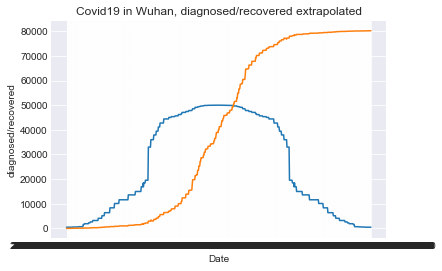

In [35]:
plt.plot(covid19_wuhan_extension.city_confirmedCount)### blue one
plt.plot(covid19_wuhan_extension.city_recoveredCount)### orange one

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

You can then reduce the size of our data by an order of magnitude:

In [36]:
covid19_wuhan_extension3 = covid19_wuhan_extension[::30]  # Selects every 30th raw starting from 0

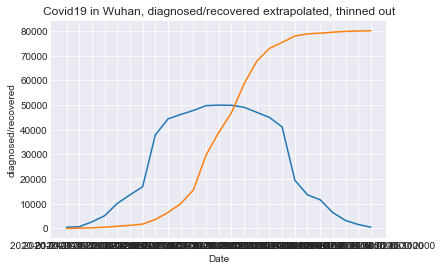

In [37]:
plt.plot(covid19_wuhan_extension3.city_confirmedCount)
plt.plot(covid19_wuhan_extension3.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

and renormalize so that all values are less than 1, with the number of recovered people slowly reaching 100%.

In [38]:
covid19_wuhan_extension.city_recoveredCount

2020-01-24 09:47:38.698           0
2020-01-24 09:48:39.253           0
2020-01-24 09:49:39.772           0
2020-01-24 09:50:40.357           0
2020-01-24 11:49:48.584           0
                              ...  
2020-05-05 16:54:11.267000    80196
2020-05-05 17:49:06.329000    80196
2020-05-05 17:58:00.660000    80196
2020-05-06 08:49:13.790000    80196
2020-05-06 18:07:03.272000    80196
Name: city_recoveredCount, Length: 732, dtype: int64

In [39]:
covid19_wuhan_extension

,city_confirmedCount,city_recoveredCount
2020-01-24 09:47:38.698,495,0
2020-01-24 09:48:39.253,495,0
2020-01-24 09:49:39.772,495,0
2020-01-24 09:50:40.357,495,0
2020-01-24 11:49:48.584,495,0
...,...,...
2020-05-05 16:54:11.267000,495,80196
2020-05-05 17:49:06.329000,495,80196
2020-05-05 17:58:00.660000,495,80196
2020-05-06 08:49:13.790000,495,80196


In [40]:
maxrecoveredCount = covid19_wuhan_extension.city_recoveredCount.iloc[-1]
print(maxrecoveredCount)
covid19_wuhan_extension4 = covid19_wuhan_extension.div(int(maxrecoveredCount))
covid19_wuhan_extension4

80196


,city_confirmedCount,city_recoveredCount
2020-01-24 09:47:38.698,0.006172,0.0
2020-01-24 09:48:39.253,0.006172,0.0
2020-01-24 09:49:39.772,0.006172,0.0
2020-01-24 09:50:40.357,0.006172,0.0
2020-01-24 11:49:48.584,0.006172,0.0
...,...,...
2020-05-05 16:54:11.267000,0.006172,1.0
2020-05-05 17:49:06.329000,0.006172,1.0
2020-05-05 17:58:00.660000,0.006172,1.0
2020-05-06 08:49:13.790000,0.006172,1.0


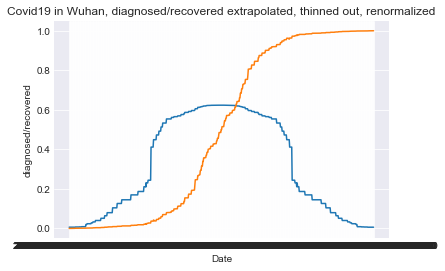

In [41]:
plt.plot(covid19_wuhan_extension4.city_confirmedCount)
plt.plot(covid19_wuhan_extension4.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out, renormalized')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

Now we have our data, we are ready for our Bayesian modeling!

### Bayesian modeling Chinese stats

We import `DifferentialEquation` from `PyMC3`:

In [50]:
import numpy as np
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import theano

Matching shapes for X and Y:

In [51]:
np.arange(0.25, 5, 0.00662).shape

(718,)

Our epidemic model dynamics are captured thusly:

In [52]:
sir_model = DifferentialEquation(
    func = SIR,
    times = np.arange(0.25, 5, 0.2),
    n_states = 2,
    n_theta = 2,
    t0 = 0,
)

We will model observations with a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability density function (pdf) whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution. 

Taking the logarithm of a dataset is a big-time prettyfier of data and is often a first target model. So we will assume that our Chinese I (infected) and R (recovered) data are log-normally distributed. We will add dead people to the recovered population since that is how we built our infectious model above.

We will assume that there is noise/error in the Chinese data, so we will tack on a standard deviation. Since that quantity is never negative, it is often modelled as a Half [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) distribution. It has an interesting history.

>**NOTE**: The half-Cauchy is heavy tailed and is regarded as fairly weakly informative. Gelman advocates for half-t priors (including the half-Cauchy) because they have better behavior for small parameter values but only regards it as weakly informative when a large scale parameter is used. See [A. Gelman (2006),
"Prior distributions for variance parameters in hierarchical models"
Bayesian Analysis, Vol. 1, N. 3, pp. 515–533](http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf). 


To model the parameters themselves, we will assume a very uninformative $R_0$ that is just $> 1$ so that we have an epidemic, a $\gamma$ that also follows a log-normal distribution (so we only use one pdf type for our model, but hey, *you're free to try another one*!), and a $\beta$ that is deterministically given by $\gamma * R_0$.

The data whose likelihood we're trying to model is given by the `sir_model` above: our function `SIR` given even further above, a time discretization from 0.25 to 5, starting from time 0, with 2D data (I, R) for Wuhan, Hubei, and 2D parameters (`R0` and `gama`). We pick Wuhan because it gives us the worst possible case since it's the epicenter of the disease.

So, sigma (`sig`) is a half-Cuachy:
```(python)
sig = pm.HalfCauchy('sig', 1, shape=2)
```

$R_0$ is another model parameter, which we bound below by 1 (>1) because an epidemic has occured!
```(python)
R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
```

We model $\gamma$ with the same pdf as the data likelihood:
```(python)
gama = pm.Lognormal('gama', pm.math.log(2), 2)
```

And so 4\beta$ is given deterministically by:
```(python)
beta = pm.Deterministic('beta', gama*R0)
```

Then we model the data likelihood thusly:
```(python)
sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])
Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sig, observed=y_wuhan4)
```

Try setting the prior to this:
```(python)
prior = pm.sample_prior_predictive()
```

And finally run your NUTS sim (you may want to start with a Metropolis sim):
```(python)
trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)
```

So, sigma (`sig`) is a half-Cuachy:

In [ ]:
sig = pm.HalfCauchy('sig', 1, shape=2)

$R_0$ is another model parameter, which we bound below by 1 (>1) because an epidemic has occured!

In [ ]:
R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)

We model $\gamma$ with the same pdf as the data likelihood:

In [ ]:
gama = pm.Lognormal('gama', pm.math.log(2), 2)

And so 4\beta$ is given deterministically by:

In [ ]:
beta = pm.Deterministic('beta', gama*R0)

Then we model the data likelihood thusly:

In [ ]:
sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])
Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sig, observed=y_wuhan4)

Try setting the prior to this:

In [ ]:
prior = pm.sample_prior_predictive()

And finally run your NUTS sim (you may want to start with a Metropolis sim):

In [ ]:
trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)

# Conclusion

Estimate the value of $R_0$ for the Coronavirus.

This is some real data science, not just an easy midterm. So try to do as much of the pandas preprocessing in class, and maybe try to finish the Bayesian modeling at home. Do as much as you can!

Good luck, data scientist! You may save the world one day, with yor modeling and predictions. God knows how dearly we need modeling these days, with global warming and all kinds of possible disasters. 

Science would not be possible without brave souls, like Li Wenliang, for whom saving his patients was more important than political propaganda. May he be a model for all of us.